## RESTAURANT REVIEWS ANALYSIS
-----

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv('C:/Users/hp/Desktop/Seminar/Restaurant-Reviews-Sentiment-Analysis/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [3]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [4]:
df.shape

(1000, 2)

In [5]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


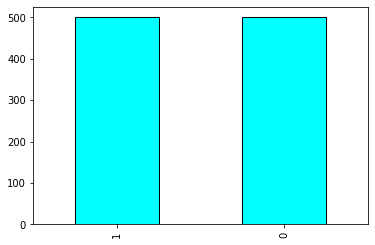

In [6]:
df['Liked'].value_counts().plot.bar(color = 'cyan',edgecolor=(0,0,0))

`DATA PREPROCESSING`

In [7]:
# Importing essential libraries for performing Natural Language Processing on 'Restaurant_Reviews.tsv' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


` Cleaning the reviews`

In [8]:
corpus = []
for i in range(0,1000):

  # Cleaning special character from the reviews
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['Review'][i])

  # Converting the entire review into lower case
  review = review.lower()

  # Tokenizing the review by words
  review_words = review.split()

  # Removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  # Stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  # Joining the stemmed words
  review = ' '.join(review)

  # Creating a corpus
  corpus.append(review)

In [9]:
corpus[0:20]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like']

In [10]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1200)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [11]:
import pickle

# Creating a pickle file for the CountVectorizer
pickle.dump(cv, open('C:/Users/hp/Desktop/Seminar/Restaurant-Reviews-Sentiment-Analysis/cv-transform.pkl', 'wb'))


MODEL BUILDING

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
from sklearn.preprocessing import MinMaxScaler

# creating a min max scaler
mm = MinMaxScaler()

# feeding the independent variables into the model
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [14]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# creating the model
model = GaussianNB()

# fitting the training data to the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# checking the accuracies
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8893333333333333
Testing Accuracy : 0.712
[[ 67  50]
 [ 22 111]]


In [15]:
import pickle
pickle.dump(model, open("C:/Users/hp/Desktop/Seminar/Restaurant-Reviews-Sentiment-Analysis/restaurant-sentiment-mnb-model.pkl", 'wb'))

In [16]:

# applying random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# creating the model
model = RandomForestClassifier()

# fitting the training data to the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# checking the accuracies
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9933333333333333
Testing Accuracy : 0.716
[[92 25]
 [46 87]]


In [17]:
# applying decision trees

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# creating the model
model = DecisionTreeClassifier()

# fitting the training data to the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# checking the accuracies
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9933333333333333
Testing Accuracy : 0.632
[[69 48]
 [44 89]]


In [18]:
# applying logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# creating the model
model = LogisticRegression()

# fitting the training data to the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# checking the accuracies
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9506666666666667
Testing Accuracy : 0.7
[[91 26]
 [49 84]]


In [19]:
# applying svm

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# creating the model
model = SVC()

# fitting the training data to the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# checking the accuracies
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

# making the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9586666666666667
Testing Accuracy : 0.696
[[100  17]
 [ 59  74]]


In [20]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [21]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))
cm=confusion_matrix(y_test,y_pred)
print(cm)

Training Accuracy : 0.9586666666666667
Testing Accuracy : 0.696
[[83 34]
 [38 95]]


In [22]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 71.2%
Precision score is: 0.74
Recall score is: 0.71


In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[83, 34],
       [38, 95]], dtype=int64)

Text(69.0, 0.5, 'Actual values')

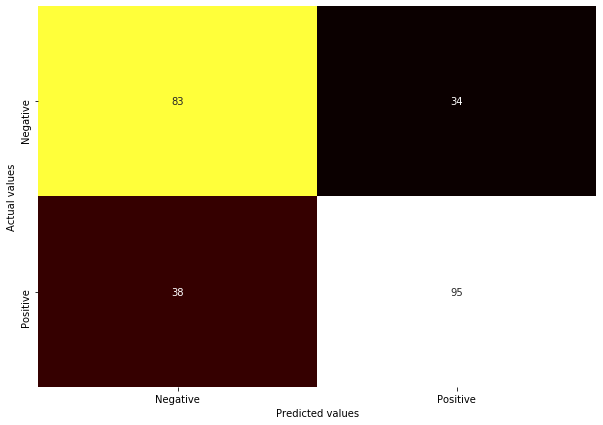

In [24]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True,cbar=False,cmap="hot", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [25]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 73.6%
Accuracy score for alpha=0.2 is: 73.2%
Accuracy score for alpha=0.3 is: 72.8%
Accuracy score for alpha=0.4 is: 72.8%
Accuracy score for alpha=0.5 is: 72.0%
Accuracy score for alpha=0.6 is: 72.0%
Accuracy score for alpha=0.7 is: 72.0%
Accuracy score for alpha=0.8 is: 71.2%
Accuracy score for alpha=0.9 is: 71.6%
Accuracy score for alpha=1.0 is: 71.2%
--------------------------------------------
The best accuracy is 73.6% with alpha value as 0.1


In [26]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

PREDICTIONS

In [27]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [28]:
# Predicting values
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [29]:
# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [30]:

# Predicting values
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.
